# **1. Implementing a Basic RNN Model**


**Import Libraries:**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

**Generate the Sine Wave Data:**

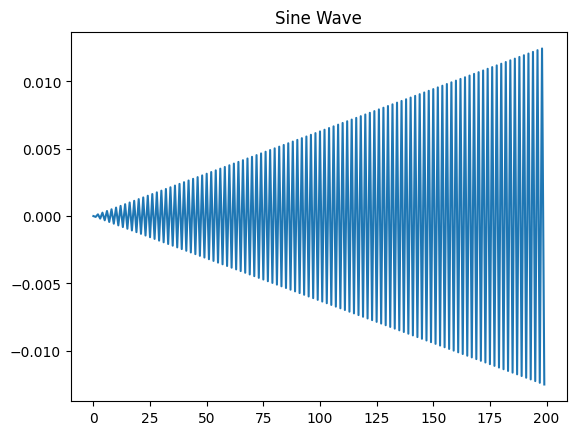

In [ ]:
# Generate a sine wave
def generate_sine_wave(seq_len, n_samples):
    x = np.linspace(0, n_samples * seq_len * np.pi, n_samples * seq_len)
    y = np.sin(x)
    return y

# Parameters
seq_len = 50
n_samples = 1000

# Generate the sine wave data
data = generate_sine_wave(seq_len, n_samples)

# Plot
plt.plot(data[:200])
plt.title('Sine Wave')
plt.show()

**Prepare the Data for RNN:**

In [ ]:
# Reshape the data
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i + seq_len])
        y.append(data[i + seq_len])
    return np.array(X), np.array(y)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data.reshape(-1, 1)).flatten()

# Create sequences
X, y = create_sequences(data_scaled, seq_len)

# Reshape X to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Build the RNN Model:**

In [ ]:
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(seq_len, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Display model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

**Train the Model:**

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - loss: 0.0240 - val_loss: 9.4449e-08
Epoch 2/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - loss: 5.7294e-08 - val_loss: 2.9486e-08
Epoch 3/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - loss: 5.7750e-08 - val_loss: 1.1612e-07
Epoch 4/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - loss: 1.9547e-06 - val_loss: 9.5538e-06
Epoch 5/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - loss: 3.4400e-06 - val_loss: 3.4716e-06
Epoch 6/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 36s 14ms/step - loss: 6.0652e-06 - val_loss: 1.6672e-06
Epoch 7/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - loss: 1.4420e-06 - val_loss: 1.3308e-06
Epoch 8/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - loss: 1.9569e-06 - val_loss: 3.1583e-06
Epoch 9/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - loss: 3.8328e-06 - val_loss: 1.9325e-08
Epoch 10/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - loss: 1.5818e-06 - val_loss: 4.3587e-08
Epoch 11/20
1249/1249 ━

**Evaluate the Model:**

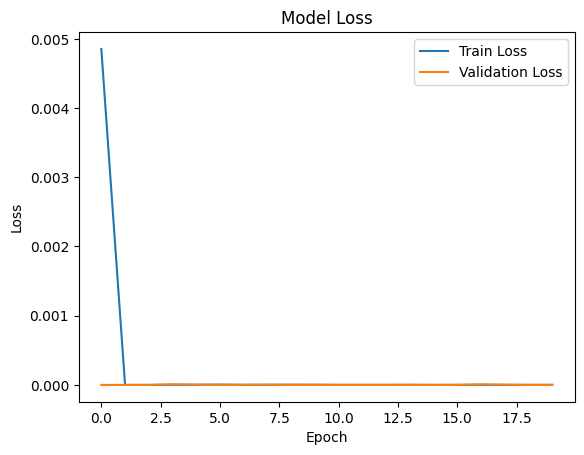

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


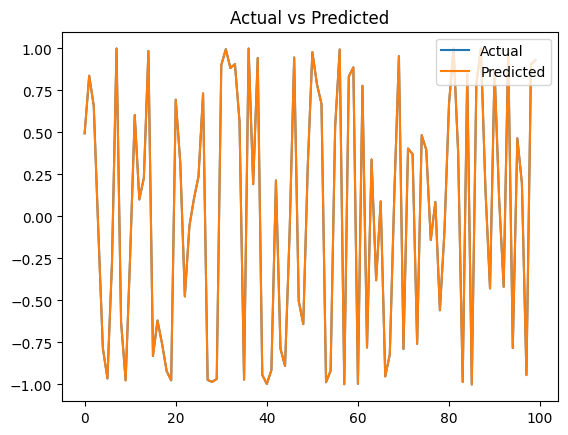

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Predict the test data
y_pred = model.predict(X_test)

# Rescale the predictions
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_rescaled = scaler.inverse_transform(y_pred)

# Plot the actual vs predicted values
plt.plot(y_test_rescaled[:100], label='Actual')
plt.plot(y_pred_rescaled[:100], label='Predicted')
plt.title('Actual vs Predicted')
plt.legend(loc='upper right')
plt.show()

# **2. Stacking RNN Layers and Bi-directional RNNs**

Build the Stacked RNN Model:

In [ ]:
# Build the stacked RNN model
model_stacked = Sequential()
model_stacked.add(SimpleRNN(50, activation='relu', return_sequences=True, input_shape=(seq_len, 1)))
model_stacked.add(SimpleRNN(50, activation='relu'))
model_stacked.add(Dense(1))
model_stacked.compile(optimizer='adam', loss='mse')

# Display model summary
model_stacked.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 50, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,701 (30.08 KB)

 Trainable params: 7,701 (30.08 KB)

 Non-trainable params: 0 (0.00 B)

Train the Stacked RNN Model:

In [ ]:
# Train the stacked RNN model
history_stacked = model_stacked.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 43s 32ms/step - loss: 0.0098 - val_loss: 2.0791e-07
Epoch 2/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 33s 26ms/step - loss: 1.2044e-07 - val_loss: 6.7058e-08
Epoch 3/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - loss: 3.1784e-07 - val_loss: 1.2363e-05
Epoch 4/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 44s 29ms/step - loss: 6.3788e-06 - val_loss: 4.3120e-07
Epoch 5/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 34s 27ms/step - loss: 1.2585e-06 - val_loss: 3.2341e-06
Epoch 6/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 44s 30ms/step - loss: 7.6248e-06 - val_loss: 6.9667e-08
Epoch 7/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 36s 26ms/step - loss: 5.0478e-06 - val_loss: 4.5402e-07
Epoch 8/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - loss: 8.4219e-06 - val_loss: 5.6090e-06
Epoch 9/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - loss: 8.3860e-07 - val_loss: 2.8140e-06
Epoch 10/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - loss: 5.6494e-06 - val_loss: 2.4882e-06
Epoch 11/20
1249/1249 ━

Evaluate the Stacked RNN Model:

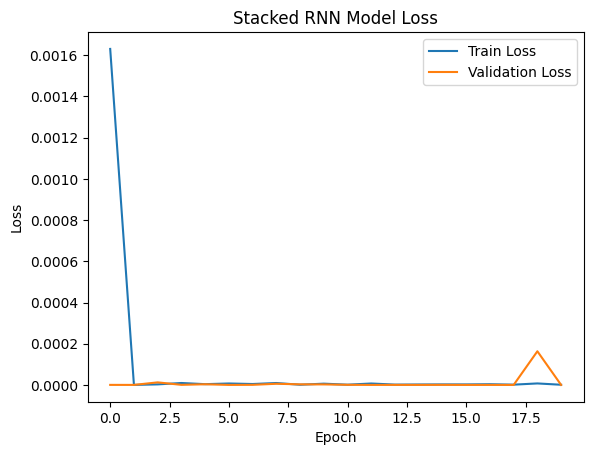

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step


In [ ]:
# Plot training & validation loss values for the stacked RNN
plt.plot(history_stacked.history['loss'], label='Train Loss')
plt.plot(history_stacked.history['val_loss'], label='Validation Loss')
plt.title('Stacked RNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Predict the test data
y_pred_stacked = model_stacked.predict(X_test)

# Rescale the predictions
y_test_rescaled_stacked = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_rescaled_stacked = scaler.inverse_transform(y_pred_stacked)

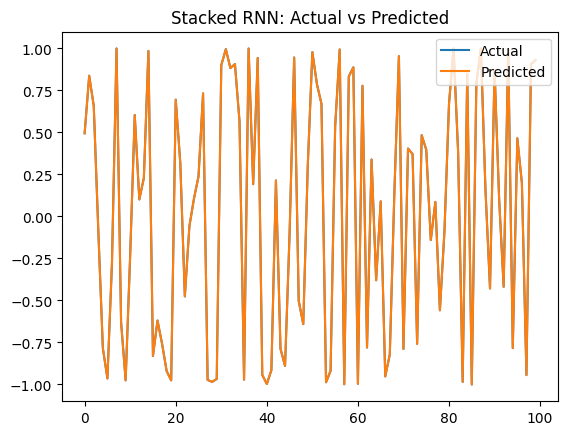

In [ ]:
# Plot the actual vs predicted values
plt.plot(y_test_rescaled_stacked[:100], label='Actual')
plt.plot(y_pred_rescaled_stacked[:100], label='Predicted')
plt.title('Stacked RNN: Actual vs Predicted')
plt.legend(loc='upper right')
plt.show()

**2. Bi-Directional RNN**

In [ ]:
from tensorflow.keras.layers import Bidirectional

Build the Bi-Directional RNN Model:

In [ ]:
# Build the bi-directional RNN model
model_bi = Sequential()
model_bi.add(Bidirectional(SimpleRNN(50, activation='relu'), input_shape=(seq_len, 1)))
model_bi.add(Dense(1))
model_bi.compile(optimizer='adam', loss='mse')

# Display model summary
model_bi.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 100)                 │           5,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,301 (20.71 KB)

 Trainable params: 5,301 (20.71 KB)

 Non-trainable params: 0 (0.00 B)

Train the Bi-Directional RNN Model:

In [ ]:
# Train the bi-directional RNN model
history_bi = model_bi.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - loss: 0.0159 - val_loss: 4.8273e-07
Epoch 2/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - loss: 5.1671e-07 - val_loss: 4.1102e-07
Epoch 3/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - loss: 6.0896e-07 - val_loss: 4.6765e-07
Epoch 4/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - loss: 1.1807e-06 - val_loss: 2.5018e-06
Epoch 5/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - loss: 2.5282e-06 - val_loss: 2.3287e-06
Epoch 6/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - loss: 3.3805e-06 - val_loss: 1.3423e-05
Epoch 7/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - loss: 5.4601e-06 - val_loss: 2.0510e-06
Epoch 8/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - loss: 4.0824e-06 - val_loss: 1.4068e-05
Epoch 9/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - loss: 3.8523e-06 - val_loss: 1.2535e-06
Epoch 10/20
1249/1249 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - loss: 3.3734e-06 - val_loss: 2.1772e-06
Epoch 11/20
1249/1249 ━

Evaluate the Bi-Directional RNN Model:

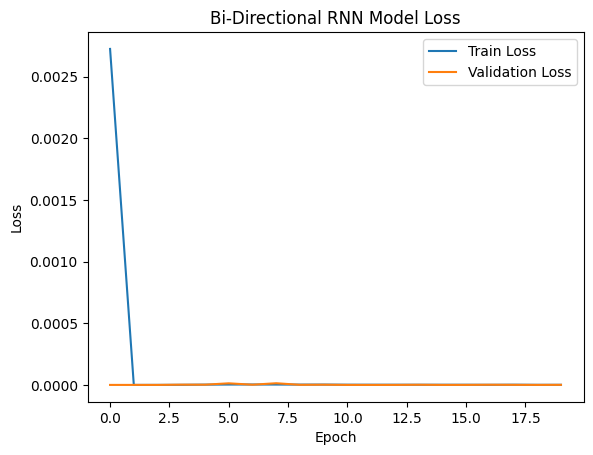

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [ ]:
# Plot training & validation loss values for the bi-directional RNN
plt.plot(history_bi.history['loss'], label='Train Loss')
plt.plot(history_bi.history['val_loss'], label='Validation Loss')
plt.title('Bi-Directional RNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Predict the test data
y_pred_bi = model_bi.predict(X_test)

# Rescale the predictions
y_test_rescaled_bi = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_rescaled_bi = scaler.inverse_transform(y_pred_bi)

In [ ]:
# Plot the actual vs predicted values
plt.plot(y_test_rescaled_bi[:100], label='Actual')
plt.plot(y_pred_rescaled_bi[:100], label='Predicted')
plt.title('Bi-Directional RNN: Actual vs Predicted')
plt.legend(loc='upper right')
plt.show()

# **3. Exploring Hybrid Architectures**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, SimpleRNN, Dense, Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Generate the sine wave data and preprocess it
def generate_sine_wave(seq_len, num_samples):
    X = []
    y = []
    for i in range(num_samples):
        t = np.linspace(0, 4 * np.pi, seq_len + 1)
        x = np.sin(t + np.random.uniform(0, 2 * np.pi))
        X.append(x[:-1])
        y.append(x[-1])
    return np.array(X), np.array(y)

seq_len = 50
num_samples = 1000
X, y = generate_sine_wave(seq_len, num_samples)

# Reshape the data for CNN input (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
y_train = scaler.fit_transform(y_train.reshape(-1, 1))
y_test = scaler.transform(y_test.reshape(-1, 1))


Build the Hybrid Model (CNN + RNN)

In [ ]:
# Build the CNN + RNN hybrid model
model_hybrid = Sequential()

# CNN layers
model_hybrid.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(seq_len, 1)))
model_hybrid.add(MaxPooling1D(pool_size=2))
model_hybrid.add(Flatten())

# RNN layer
model_hybrid.add(Dense(50, activation='relu'))
model_hybrid.add(Dense(1))

# Compile the model
model_hybrid.compile(optimizer='adam', loss='mse')

# Display model summary
model_hybrid.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 48, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 24, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 768)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │          38,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,629 (150.89 KB)

 Trainable params: 38,629 (150.89 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the hybrid model
history_hybrid = model_hybrid.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0950 - val_loss: 0.0015
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0018 - val_loss: 4.1063e-04
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7753e-04 - val_loss: 2.4353e-05
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.8360e-05 - val_loss: 1.9196e-05
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7546e-05 - val_loss: 1.7241e-05
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.2793e-05 - val_loss: 1.2647e-05
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0543e-05 - val_loss: 1.2220e-05
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0574e-05 - val_loss: 9.9931e-06
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.9026e-06 - val_loss: 9.2950e-06
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.7953e-06 - val_loss: 7.5052e-06
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.4462e-06 - val_loss: 5.9882e

5. Evaluate the Hybrid Model

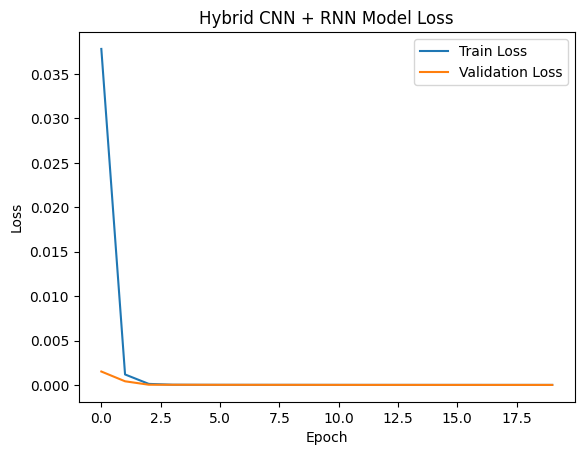

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [ ]:
# Plot training & validation loss values for the hybrid model
plt.plot(history_hybrid.history['loss'], label='Train Loss')
plt.plot(history_hybrid.history['val_loss'], label='Validation Loss')
plt.title('Hybrid CNN + RNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Predict the test data
y_pred_hybrid = model_hybrid.predict(X_test)

# Rescale the predictions
y_test_rescaled_hybrid = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_rescaled_hybrid = scaler.inverse_transform(y_pred_hybrid)

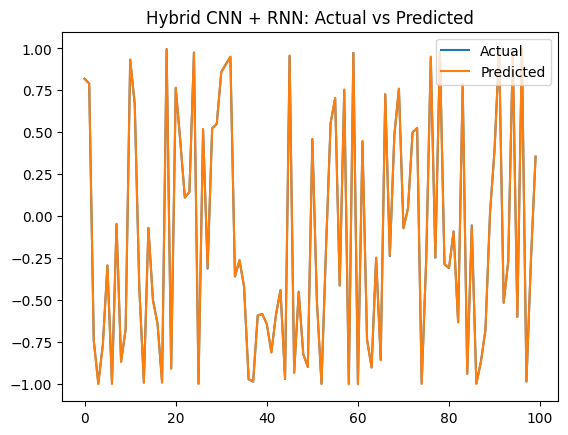

In [ ]:
# Plot the actual vs predicted values
plt.plot(y_test_rescaled_hybrid[:100], label='Actual')
plt.plot(y_pred_rescaled_hybrid[:100], label='Predicted')
plt.title('Hybrid CNN + RNN: Actual vs Predicted')
plt.legend(loc='upper right')
plt.show()